In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [3]:
print("Dataset Shape")
credit_card_data.shape

Dataset Shape


(284807, 31)

In [4]:
#attributes or features of data set
credit_card_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
credit_card_data.Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [6]:
# print first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#print last 5 rows of dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### checking missing values

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()
     

0    284315
1       492
Name: Class, dtype: int64

In [11]:
credit_card_data.shape

(284807, 31)

## Correlation matrix

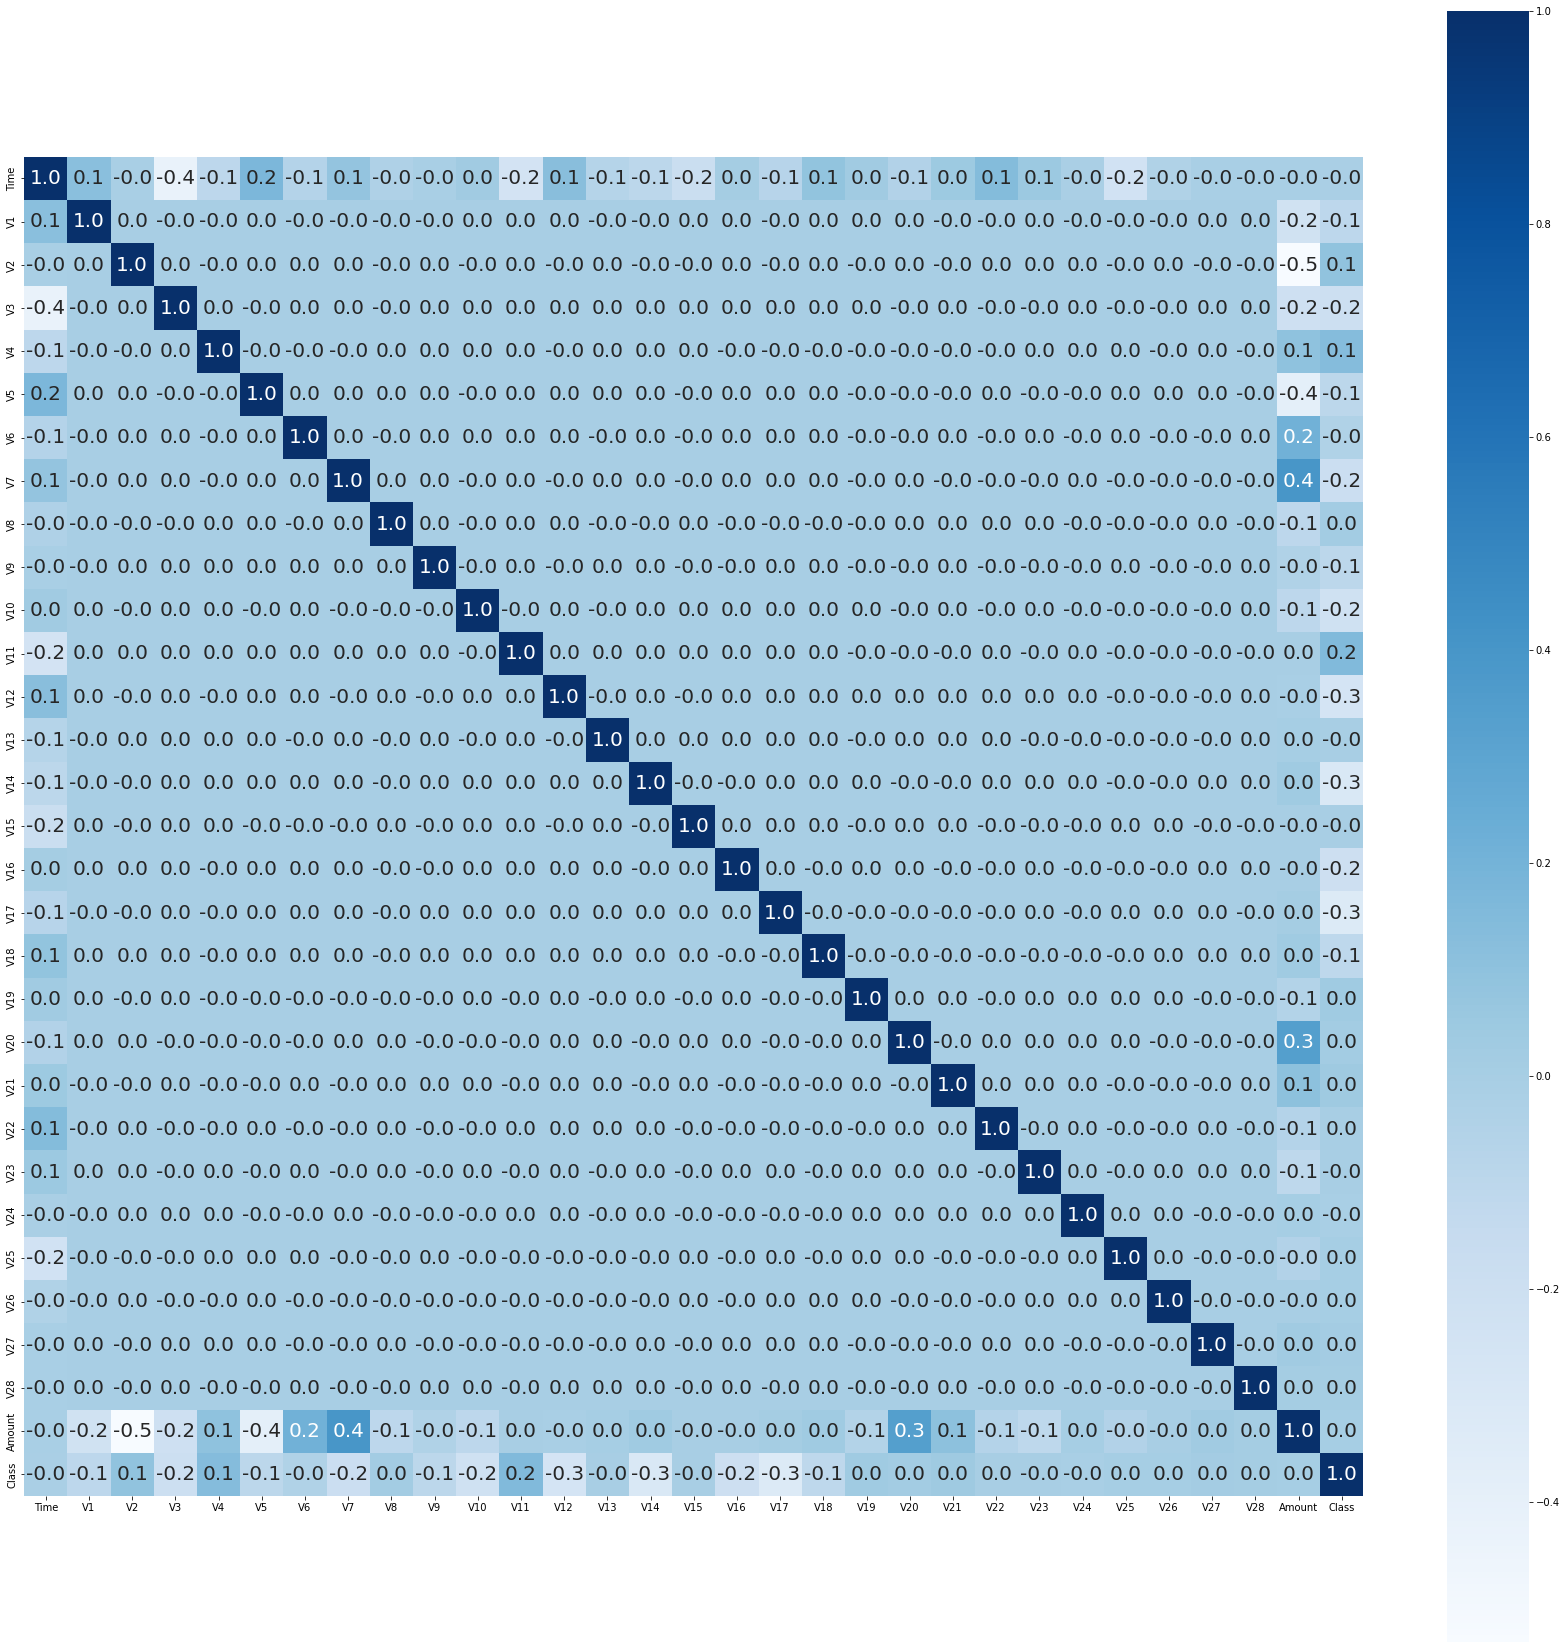

In [12]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = credit_card_data.corr()
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(corrmat, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap="Blues")

## central tendencies
## mean, median, or mode

C:\Users\devri\AppData\Local\Temp\ipykernel_18360\3310168504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.V1)


<AxesSubplot: xlabel='V1', ylabel='Density'>

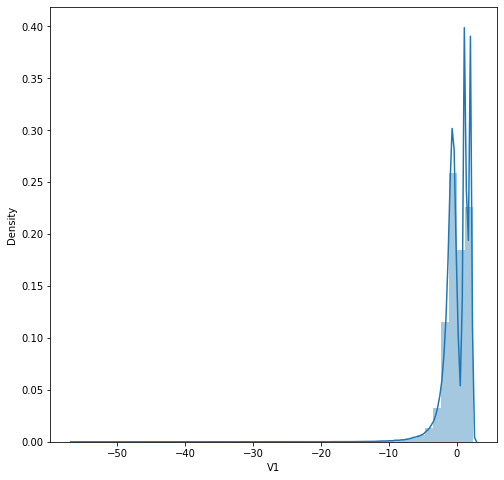

In [13]:
# analyse the distrbutio of data in v1
fig, ax = plt.subplots(figsize = (8, 8))
sns.distplot(credit_card_data.V1)

In [75]:
#finding median of V1 and replacing
#credit_card_data['V1'].fillna(credit_card_data['V1'].median(), inplace=True)

### checking and removing duplicate values

In [14]:
#checking if any duplicate values and removing duplicates
credit_card_data.drop_duplicates(inplace=True)


In [16]:
credit_card_data.shape
# distribution of legit transactions & fraudulent transactions

(283726, 31)

In [17]:
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

#### checking total count of legit and fraudulent transactions

Text(0, 0.5, 'Frequency')

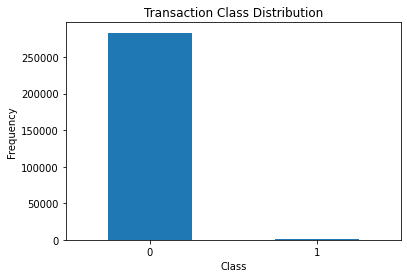

In [18]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [19]:
#Fraudulent transactions is very less compared to normal transactions

#Total count of legit and fraudulent transactions

In [20]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()
     

0    283253
1       473
Name: Class, dtype: int64

In [21]:
#This Dataset is highly unblanced

#0 --> Normal Transaction

#1 --> fraudulent transaction

#Separating legit and fraudulent transactions

In [22]:
# separating the data for analysis
#legit and fraud are two pandas variables
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [23]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [24]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
# statistical measures of the data
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [26]:
# compare the values for both transactions
# comparision is based on example mean of V1 column for class 0 and 1
#this difference is very important for machine learning because by this we can find whether one transaction is legit or fraudulent transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
#Here we see that the mean of normal transactions is very less than the mean of fraudulent transactions

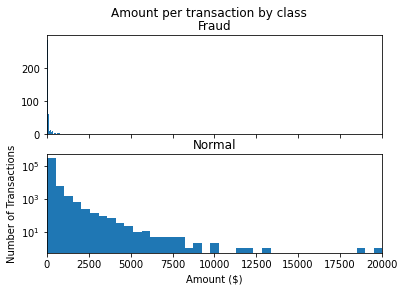

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();
     

In [ ]:
#we can see that the transaction is very small for fraud dataset
#and transaction amount is very very large for normal transactions

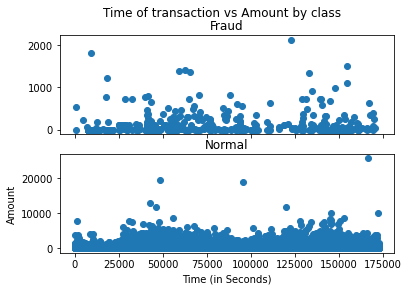

In [28]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [88]:
# here we see how many different different transactions are there in terms of time

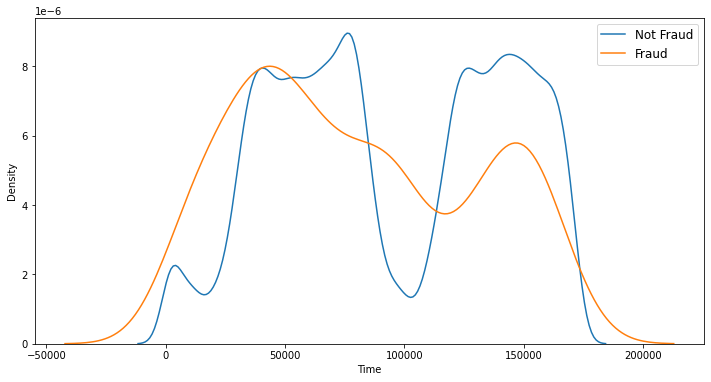

In [29]:
#Time
plt.figure(figsize = [12,6])
sns.kdeplot(credit_card_data[credit_card_data.Class == 0].Time, label = 'Not Fraud')
sns.kdeplot(credit_card_data[credit_card_data.Class == 1].Time, label = 'Fraud')
plt.legend(fontsize = 12)

In [ ]:
#Fraudulent transaction are more evenly distributed than non-fraudulent ones.
#It looks like fraudulent transactions were relatively lesser at higher time
#(the seconds elapsed between each transaction and the first transaction).

## Since the dataset is highly imbalance. therefore we go for sampling
### 1. Undersampling
### 2. oversampling

# undersampling

### using random undersampling

In [ ]:
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#Number of Fraudulent Transactions --> 473

In [30]:
#picking up 473 random legit transactions
legit_sample = legit.sample(n=473)

In [31]:
#making a  new dataset by combining the legit and fraudulent transactions`
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [32]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [33]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119945,75643.0,1.134834,0.204508,0.354653,1.011364,-0.195033,-0.304947,-0.002042,0.080026,-0.183806,...,0.114417,0.328413,-0.051822,0.216649,0.531012,-0.326784,0.021023,0.008030,8.80,0
127199,78241.0,-1.621030,0.862630,2.315119,0.365044,-0.338840,1.388370,-0.222018,-1.208584,-0.599619,...,1.645495,-0.151777,-1.023982,-0.223993,0.007055,0.942791,0.244101,0.012744,201.46,0
272216,164971.0,0.026575,0.810747,0.182198,-0.776981,0.622062,-0.620108,0.897378,-0.038829,-0.279552,...,-0.230875,-0.518746,0.014517,-0.343109,-0.477782,0.140737,0.243353,0.083854,1.79,0
213551,139300.0,0.680816,-2.267245,-0.465483,1.909538,-1.487162,-0.053938,0.111635,-0.130113,1.063029,...,0.476127,0.110145,-0.305036,0.051677,-0.556115,-0.804694,-0.037441,0.093835,650.00,0
166590,118185.0,-0.958830,0.210959,1.930703,-1.235706,1.068162,-0.121038,0.437882,0.031366,0.415754,...,-0.198236,-0.637191,-0.259217,0.195100,0.455434,-0.604339,-0.143238,-0.149227,1.18,0


In [34]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


### Splitting the data into Features & Targets

In [35]:
# target is either 0 or 1
#we are dropping the class column so we set axis=1
#and store in X variable
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

### Spliting into training and testing data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(946, 30) (756, 30) (190, 30) (756,) (190,)


### standardizing data

In [38]:
stdsc = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = stdsc.fit_transform(X_train[['Amount']])
#X_train = stdsc.fit_transform(X_train)
X_test['Amount'] = stdsc.transform(X_test[['Amount']])

## Model Training

# logistic

In [39]:
classifier = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,Y_train)

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [40]:
##prediction with test data
X_test_pred=classifier_regressor.predict(X_test)
score=accuracy_score(X_test_pred,Y_test)
print(score)

0.9315789473684211


# decision tree

In [41]:
## Postpruning
treemodel=DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)
#prediction
X_test_pred1=treemodel.predict(X_test)
score=accuracy_score(X_test_pred1,Y_test)
print(score)

0.9


# SVM

In [42]:
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, Y_train)
X_test_pred2 = svc_classifier.predict(X_test)
score=accuracy_score(X_test_pred2,Y_test)
print(score)

0.5105263157894737


# Random Forest

In [43]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,Y_train)
X_test_pred3 = rfc_model.predict(X_test)
score=accuracy_score(X_test_pred3,Y_test)
print(score)

0.9368421052631579


## confusion matrix and classification report

In [44]:
print("logistic regression")
print(confusion_matrix(Y_test,X_test_pred))
print("accuracy_score  ", accuracy_score(Y_test,X_test_pred))
print(classification_report(Y_test,X_test_pred))

logistic regression
[[91  4]
 [ 9 86]]
accuracy_score   0.9315789473684211
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.96      0.91      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



In [45]:
print("descision tree")
print(confusion_matrix(Y_test,X_test_pred1))
print("accuracy_score  ", accuracy_score(Y_test,X_test_pred1))
print(classification_report(Y_test,X_test_pred1))

descision tree
[[85 10]
 [ 9 86]]
accuracy_score   0.9
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        95
           1       0.90      0.91      0.90        95

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



In [46]:
print("SVM")
print(confusion_matrix(Y_test,X_test_pred2))
print("accuracy_score  ", accuracy_score(Y_test,X_test_pred2))
print(classification_report(Y_test,X_test_pred2))

SVM
[[44 51]
 [42 53]]
accuracy_score   0.5105263157894737
              precision    recall  f1-score   support

           0       0.51      0.46      0.49        95
           1       0.51      0.56      0.53        95

    accuracy                           0.51       190
   macro avg       0.51      0.51      0.51       190
weighted avg       0.51      0.51      0.51       190



In [47]:
print("random forest")
print(confusion_matrix(Y_test,X_test_pred3))
print("accuracy_score  ", accuracy_score(Y_test,X_test_pred3))
print(classification_report(Y_test,X_test_pred3))

random forest
[[92  3]
 [ 9 86]]
accuracy_score   0.9368421052631579
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.97      0.91      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



In [53]:
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Transaction is not fraud')
else:
  print('The Transaction is fraud')

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0]
The Transaction is not fraud


# oversampling

### using SMOTE

### splitting the data into target and features

In [20]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [21]:
X.shape, Y.shape

((284807, 30), (284807,))

### spliting the data into trainig and testing data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [6]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(284807, 30) (227845, 30) (56962, 30) (227845,) (56962,)


### standardization

In [7]:
stdsc = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = stdsc.fit_transform(X_train[['Amount']])
#X_train = stdsc.fit_transform(X_train)
X_test['Amount'] = stdsc.transform(X_test[['Amount']])

### applying oversampling using SMOTE

In [120]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter

AFTER SMOTE
The number of classes before fit Counter({0: 226602, 1: 378})
The number of classes after fit Counter({0: 226423, 1: 226423})


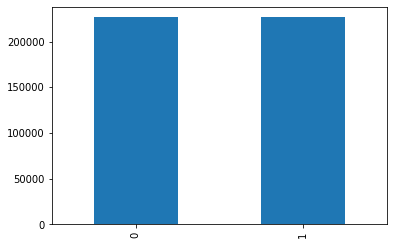

In [121]:
os=SMOTETomek(random_state=42)
X_train_ns,y_train_ns=os.fit_resample(X_train,Y_train)
print("AFTER SMOTE")
y_train_ns.value_counts().plot.bar()
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

### Training model

## logistic

In [122]:
classifier = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,Y_train)

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [124]:
y_pred=classifier_regressor.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56628    23]
 [   30    65]]
accuracy_score   0.999066013463504
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.74      0.68      0.71        95

    accuracy                           1.00     56746
   macro avg       0.87      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)

## decision tree

In [125]:
## Postpruning
treemodel=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=2)
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [126]:
y_pred=treemodel.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56631    20]
 [   26    69]]
accuracy_score   0.9991893701758714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.78      0.73      0.75        95

    accuracy                           1.00     56746
   macro avg       0.89      0.86      0.87     56746
weighted avg       1.00      1.00      1.00     56746



## SVM

In [127]:
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, Y_train)

SVC()

In [128]:
y_pred=svc_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56651     0]
 [   95     0]]
accuracy_score   0.9983258731892997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [25]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56848    16]
 [   14    84]]
accuracy_score   0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)

Text(33.0, 0.5, 'Predicted')

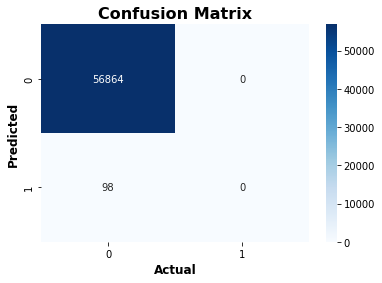

In [55]:
cnf_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

## Oversampling by using RandomOversampling technique

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
os =  RandomOverSampler(random_state=42)
X_train_ns,y_train_ns=os.fit_resample(X_train,Y_train)
#print("The number of classes before fit {}".format(Counter(Y_train)))
#print("The number of classes after fit {}".format(Counter(y_train_ns)))

### logistic regression

In [26]:
classifier = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,Y_train)

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------------

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [27]:
y_pred=classifier_regressor.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56854    10]
 [   36    62]]
accuracy_score   0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
cnf_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

In [48]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)

0.9234078373893171

### decision tree

In [28]:
## Postpruning
treemodel=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=2)
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [29]:
y_pred=treemodel.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56847    17]
 [   29    69]]
accuracy_score   0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.70      0.75        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)

0.9234078373893171

### random forest

In [30]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [31]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56858     6]
 [   17    81]]
0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

In [50]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)
#auc = roc_auc_score(Y_test, y_pred)
#print(f'AUC Score: {auc}')

0.9234078373893171

### SVM

In [32]:
#SVM
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, Y_train)

SVC()

In [33]:
y_pred=svc_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("accuracy_score  ", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[56864     0]
 [   98     0]]
accuracy_score   0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [53]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,  y_pred)

0.5

In [130]:
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = treemodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Transaction is not fraud')
else:
  print('The Transaction is fraud')

[0]
The Transaction is not fraud


C:\Users\devri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
